# UNIT 4 CAPSTONE

Data: [MetroLyrics](https://www.kaggle.com/gyani95/380000-lyrics-from-metrolyrics)

# Introduction 

The following are Lyrics from songs that were collected. We can s
 This the original source can be found [here](https://www.kaggle.com/gyani95/380000-lyrics-from-metrolyrics)

There are a lot of artist and musical genres included in this data set. We also divided the lyrics in verses.    
For this research, will only focus on the Hip-Hop genre. And will focus on predicting the artist from the Top 10 rappers in this particular dataset. We will clean the lyrics by removing punctuations, special characters and all the name of the rappers and squad of the particular artists in say Top 10. Even though Dre is not one of the top 10 artists in our dataset, we decided to remove his name, bc it looked like he produced the majority of the songs by some of the top 10 artist like, Eminem, 2Pac, 50 Cent for instance so is name was mentioned quite a bit in their song's lyrics.   


## Loading Libraries

In [180]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re


import time

from IPython.display import Image
from IPython.display import display

import warnings
# Suppress annoying harmless error.
warnings.simplefilter('ignore')

## Loading Data

In [2]:
df = pd.read_csv('lyrics.csv')

## Cleaning the Data

In [3]:
print('The shape of the  data is:', df.shape)
display(df.head())

The shape of the  data is: (362237, 6)


,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [4]:
df.columns

Index(['index', 'song', 'year', 'artist', 'genre', 'lyrics'], dtype='object')

In [5]:
# Count nulls 
null_count = df.isnull().sum()
null_count[null_count>0]

song          2
lyrics    95680
dtype: int64

In [6]:
## There are a lots of songs that don't have any lyrics 
## We should remove them
df = df.dropna()

In [7]:
# Count nulls 
null_count = df.isnull().sum()
null_count[null_count>0]

Series([], dtype: int64)

In [8]:
df.dtypes

index      int64
song      object
year       int64
artist    object
genre     object
lyrics    object
dtype: object

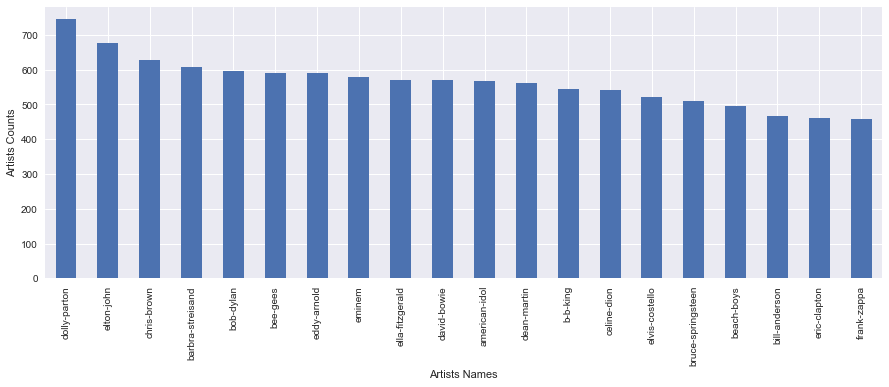

In [9]:
plt.figure(figsize=(15, 5))
df.artist.value_counts().head(20).plot(kind='bar')
plt.ylabel('Artists Counts')
plt.xlabel('Artists Names')
plt.show()

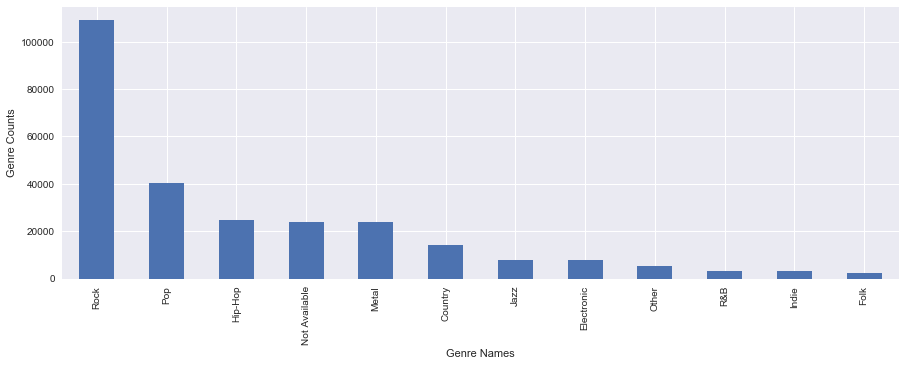

In [10]:
plt.figure(figsize=(15, 5))
df.genre.value_counts().head(20).plot(kind='bar')
plt.ylabel('Genre Counts')
plt.xlabel('Genre Names')
plt.show()

We can see that there are a lot of songs under the __Rock__ genre.    
A good idea would be to look at songs in the __Pop__ and __Hip-Hop__ genres and see if we can predict the artists given the lyrics of say songs.   

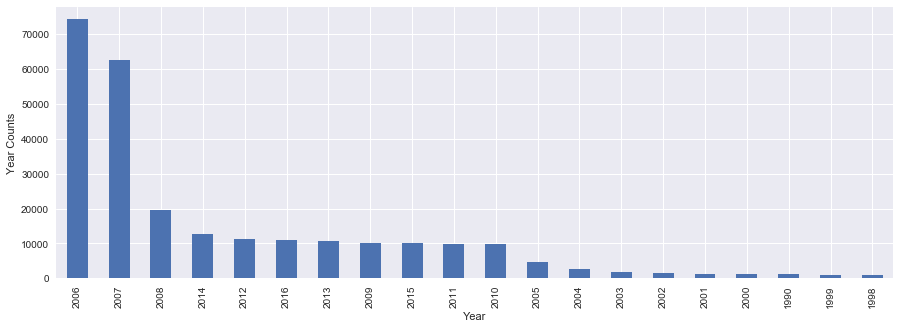

In [11]:
plt.figure(figsize=(15, 5))
df.year.value_counts().head(20).plot(kind='bar')
plt.ylabel('Year Counts')
plt.xlabel('Year')
plt.show()

We can see that there are a lont of songs from 2006 and 2007 in the data.    
Maybe we can restrict our data to only songs from the 2000 forward.  

In [12]:
df_1= df[df['year']>= 1990]
df_2= df[df['year']<= 1989]
print('The top 5 years from 1990 onwards \n', df_1['year'].value_counts()[:5])
print('\nThe top 5 years from 1989 backwards \n', df_2['year'].value_counts()[:5])

The top 5 years from 1990 onwards 
 2006    74257
2007    62562
2008    19609
2014    12769
2012    11299
Name: year, dtype: int64

The top 5 years from 1989 backwards 
 1989    264
1977    256
1973    246
1982    246
1980    203
Name: year, dtype: int64


In [13]:
#reading in the data, this time in the form of verses
df_Lyr = df['lyrics']

In [21]:
#processing
df_verse=[]
for lyrics in df_Lyr:
    lyrics = lyrics.split('\n')
    #Forming each verse into a string and adding it to the list of strings.
    #df1_verse.append(' '.join(lyrics))
    df_verse.append(lyrics)

print('\nSong Verses in 1st song:\n',df_verse[0])


Song Verses in 1st song:
 ['Oh baby, how you doing?', "You know I'm gonna cut right to the chase", 'Some women were made but me, myself', 'I like to think that I was created for a special purpose', "You know, what's more special than you? You feel me", "It's on baby, let's get lost", "You don't need to call into work 'cause you're the boss", 'For real, want you to show me how you feel', "I consider myself lucky, that's a big deal", 'Why? Well, you got the key to my heart', "But you ain't gonna need it, I'd rather you open up my body", "And show me secrets, you didn't know was inside", 'No need for me to lie', "It's too big, it's too wide", "It's too strong, it won't fit", "It's too much, it's too tough", "He talk like this 'cause he can back it up", 'He got a big ego, such a huge ego', "I love his big ego, it's too much", "He walk like this 'cause he can back it up", "Usually I'm humble, right now I don't choose", 'You can leave with me or you could have the blues', 'Some call it arro

In [23]:
##Create new Feature.
df['verses'] = df_verse

In [24]:
display(df.head())

,index,song,year,artist,genre,lyrics,verses
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...","[Oh baby, how you doing?, You know I'm gonna c..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...","[playin' everything so easy,, it's like you se..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,"[If you search, For tenderness, It isn't hard ..."
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...","[Oh oh oh I, oh oh oh I, [Verse 1:], If I wrot..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...","[Party the people, the people the party it's p..."


In [25]:
df['genre'].value_counts()

Rock             109235
Pop               40466
Hip-Hop           24850
Not Available     23941
Metal             23759
Country           14387
Jazz               7970
Electronic         7966
Other              5189
R&B                3401
Indie              3149
Folk               2243
Name: genre, dtype: int64

In [26]:
df.artist.value_counts()[:5]

dolly-parton        744
elton-john          676
chris-brown         628
barbra-streisand    607
bob-dylan           596
Name: artist, dtype: int64

In [27]:
df[df['artist'] == 'christina-aguilera']['song'][:5]

311165                                      hi-gneth
311166                         falling-in-love-again
311167    can-you-feel-the-love-tonight-live-version
311169               what-a-girl-wants-video-version
311170                               im-leavin-today
Name: song, dtype: object

In [28]:
df[df['genre'] == 'Hip-Hop']['artist'].value_counts()[:5]

chris-brown       628
eminem            578
50-cent           398
chamillionaire    396
drake             373
Name: artist, dtype: int64

In [29]:
df[df['genre'] == 'Not Available']['artist'].value_counts()[:5]

andrea-bocelli            298
dancing-with-the-stars    278
emma-forman               222
glee                      211
chaka-khan                210
Name: artist, dtype: int64

### Cleaning the Lyrics 

In [30]:
#Lyrics of 1st song in dataframe 
df['lyrics'][0]

"Oh baby, how you doing?\nYou know I'm gonna cut right to the chase\nSome women were made but me, myself\nI like to think that I was created for a special purpose\nYou know, what's more special than you? You feel me\nIt's on baby, let's get lost\nYou don't need to call into work 'cause you're the boss\nFor real, want you to show me how you feel\nI consider myself lucky, that's a big deal\nWhy? Well, you got the key to my heart\nBut you ain't gonna need it, I'd rather you open up my body\nAnd show me secrets, you didn't know was inside\nNo need for me to lie\nIt's too big, it's too wide\nIt's too strong, it won't fit\nIt's too much, it's too tough\nHe talk like this 'cause he can back it up\nHe got a big ego, such a huge ego\nI love his big ego, it's too much\nHe walk like this 'cause he can back it up\nUsually I'm humble, right now I don't choose\nYou can leave with me or you could have the blues\nSome call it arrogant, I call it confident\nYou decide when you find on what I'm working 

In [133]:
#Here we clean the lyrics by removing all the new lines, punctuation, 
#things inside [] and {} and making everything lower case

df['lyrics'] = df['lyrics'].str.replace(r'\n', ' ')
df['lyrics'] = df['lyrics'].str.replace(r'--',' ')
df['lyrics'] = df['lyrics'].str.replace("[\[].*?[\]]", "")
df['lyrics'] = df['lyrics'].str.replace("[\{].*?[\}]", "")
df['lyrics'] = df['lyrics'].str.replace(r'\.|\!|\?|\'|,|\:|-|\(|\)|\{|\}|\"', "",).fillna('')
df['lyrics'] = df['lyrics'].str.lower()
df['lyrics'] = df['lyrics'].str.replace(r'50|cent|gunit|dre|pac|makaveli|outlawz|flipmode|squad|busta|rhymes|drake|drizzy|e40|40|dmx|ruff|ryders', "")
df['lyrics'] = df['lyrics'].str.replace(r'chamillionaire|koopa|chamillion|chamillitary|chamillitary|slim|shady|em|eminem|marshall|mathers|chris|brown|breezy', "")

We are going to restrict our data to the Hip-Hop genre and attempt to predict artist name based on the Lyrics.   
We also had to removed the names, nicknames and crew names of the Top 10 artists.  
The artist __game__ didn't have is name removed because, game is also a word that is used a lot by rappers.   

In [134]:
df2 = df.loc[df['genre'] == 'Hip-Hop',['song','artist','lyrics','verses']]

In [135]:
display(df2.head())

,song,artist,lyrics,verses
249,i-got-that,eazy-e,horns chorus timbo when you hit me on my phone...,"[(horns)..., (chorus), Timbo- When you hit me ..."
250,8-ball-remix,eazy-e,verse 1 i dont drink brass monkey like to be f...,"[Verse 1:, I don't drink brass monkey, like to..."
251,extra-special-thankz,eazy-e,19 muthaphukkin 93 and im back in this bitch e...,"[19 muthaphukkin 93,, and I'm back in this bit..."
252,boyz-in-da-hood,eazy-e,hey yo man rber that shit eazy did a while bac...,"[Hey yo man, remember that shit Eazy did a whi..."
253,automoblie,eazy-e,yo man i take this bitch out to the movies an...,"[Yo, Dre, man, I take this bitch out to the mo..."


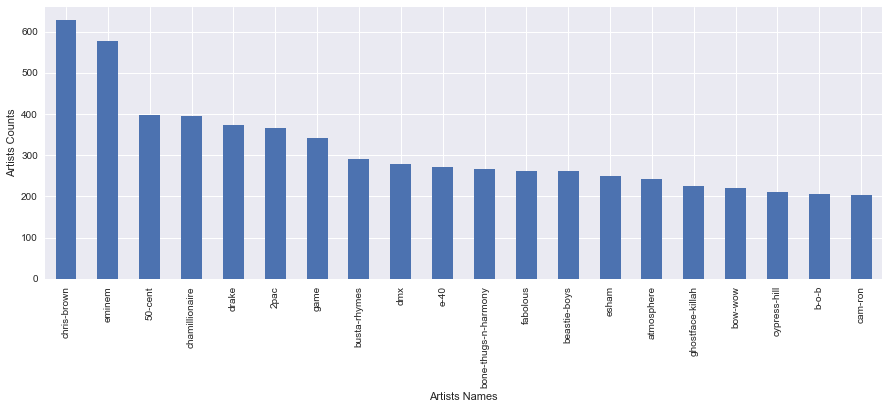

Number of total artists (1107,)


In [136]:

plt.figure(figsize=(15, 5))
df2.artist.value_counts().head(20).plot(kind='bar')
plt.ylabel('Artists Counts')
plt.xlabel('Artists Names')
plt.show() 

print('Number of total artists', df2.artist.value_counts().shape)

We have about 1107 artists, we need to reduce it to 10 artist. 

In [137]:
print('The Top 10 artists number of songs are:')
print(list(df2.artist.value_counts().sort_values(0,ascending = False)[:10]))

Top_10 = list(df2.artist.value_counts().loc[lambda s: s > 270].index)
print('\nThe Top 10 artists are:')
print(Top_10)

The Top 10 artists number of songs are:
[628, 578, 398, 396, 373, 367, 341, 292, 279, 272]

The Top 10 artists are:
['chris-brown', 'eminem', '50-cent', 'chamillionaire', 'drake', '2pac', 'game', 'busta-rhymes', 'dmx', 'e-40']


In [138]:
## We reduce df2 to only the Top 10 artists
df2 = df2.loc[df2['artist'].isin(Top_10)]

## Create Training and Test Set

In [139]:
Y = df2['artist']
X = df2['lyrics']

In [140]:
from sklearn.model_selection import train_test_split

#  Create Training and Test Sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=None)


## Create Features Using tf-idf

### Create Vectorizer 

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             #lowercase=True, #convert everything to lower case 
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

In [142]:
#Applying the vectorizer
X_train_tfidf=vectorizer.fit_transform(X_train)
X_test_tfidf=vectorizer.transform(X_test)


## Modelling

### Using Random Forest Classifier 

In [240]:
### Random Forest Classifier

from sklearn import ensemble 
rfc = ensemble.RandomForestClassifier(max_depth=10,max_features='auto', n_estimators=40)
start_time = time.clock() 
rfc.fit(X_train_tfidf, Y_train)
print('Runtime for Random Forest: '+'%s seconds'% (time.clock() - start_time)) # End time for execution speed.

Runtime for Random Forest: 0.45209299999987707 seconds


In [241]:
rfc_features = pd.DataFrame(rfc.feature_importances_)
rfc_features.index = vectorizer.get_feature_names()
rfc_features.sort_values(0,ascending = False).head(30)

,0
fuck,0.012969
girl,0.012094
thug,0.010892
babe,0.009647
nigga,0.009599
fuckin,0.008843
love,0.008012
niggas,0.007972
die,0.007435
bust,0.007262


In [242]:
print('Total number of features found:', rfc_features.shape)

Total number of features found: (19134, 1)


In [243]:
print('Training set score:', rfc.score(X_train_tfidf, Y_train))
print('\nTest set score:', rfc.score(X_test_tfidf, Y_test))

from sklearn.model_selection import cross_val_score

cv_train = cross_val_score(rfc, X_train_tfidf, Y_train, cv=5)

### Put this with the Cross validation score.
plusminus = u"\u00B1"
 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cv_train.mean(), plusminus, 2*cv_train.std(), cv_train))


Training set score: 0.752293577982

Test set score: 0.529051987768

Cross validation results: 53.215% ± 2.377% 
 
 [ 0.50927487  0.5440678   0.53571429  0.53662692  0.53504274]


This seem to be overfitting.   
The standard deviation is also high, might need to update some hyperparameters and see if we can improve on the results.   

In [244]:
# saving model predictions
Y_train_pred_rfc = rfc.predict(X_train_tfidf)
print('\nComparing SGDC data against the training set data:')
print(pd.crosstab(Y_train, Y_train_pred_rfc))


Comparing SGDC data against the training set data:
col_0           2pac  50-cent  busta-rhymes  chamillionaire  chris-brown  dmx  \
artist                                                                          
2pac             233        0             0               0           48    0   
50-cent            1      191             0               0           76    0   
busta-rhymes       1        0           131               0           75    0   
chamillionaire     0        0             0             228           50    0   
chris-brown        0        0             0               0          481    0   
dmx                2        1             1               0           52  135   
drake              0        0             0               0          136    0   
e-40               5        2             0               2           57    0   
eminem             0        1             1               0           58    0   
game               2        1             0              

__2pac__  238 predicted correctly, 48 as chris-brown and 3 as eminem's   
__50-cent__ 191 predicted correctly, 1 as 2pac, 76 as chris-brown and 18 as eminem's    
__busta-rhymes__ 131 predicted correctly, 1 as 2pac, 75 as chris-brown and 13 as eminem's   
__chamillionaire__ 228 predicted correctly, 50 as chris-brown and 4 as eminem's   
__chris-brown__ 481 predicted correctly and 1 as eminem's   
__dmx__  135 predicted correctly, 2 as 2pac, 1 as 50-cent, 1 as busta-rhymmes, 52 as chris-brown  and 20 as eminem's   
__drake__ 151 predicted correctly, 136 as chris-brown and 8 as eminem's   
__e-40__ 123 predicted correctly, 5 as 2pac, 2 as 50-cent and chamillionaire, 57 as chris-brown and 16 as eminem's   

__eminem__ 379 predicted correctly, 1 as 50-cent and busta-rhymes, 58 as chris-brown    
__game__ 162 predicted correctly, 2 as 2pac, 60 as chris-brown, 1 as drake and 50-cent, and 16 as eminem's   


From this we can conclude that RFC is not a good predictor for the lyrics of particular artists.  
For instance, artists like chris-brown and eminem because they have the most lyrics, a lot of other artists songs get predicted as belonging to them.    


### Using SGD Classifier

In [148]:
from sklearn import linear_model
sgdc = linear_model.SGDClassifier()

start_time = time.clock() 
sgdc.fit(X_train_tfidf, Y_train)
print('Runtime for Stochastic Gradient: '+'%s seconds'% (time.clock() - start_time)) # End time for execution speed.

Runtime for Stochastic Gradient: 0.17278999999996358 seconds


In [158]:
sgdc_features = pd.DataFrame(sgdc.coef_[0],sgdc.coef_[1])
sgdc_features.index = vectorizer.get_feature_names()
sgdc_features.sort_values(0,ascending = False).head(30)

,0
thug,5.280894
tu,3.242447
outlaw,2.526794
homies,2.457502
expect,2.332051
peace,2.300070
mutha,2.258435
wicked,2.176527
troublesome,2.150295
westside,1.990927


In [231]:
print('Total numbers of features found:',sgdc_features.shape)

Total numbers of features found: (19134, 1)


In [151]:
print('Training set score:', sgdc.score(X_train_tfidf, Y_train))
print('\nTest set score:', sgdc.score(X_test_tfidf, Y_test))

from sklearn.model_selection import cross_val_score

cv_train = cross_val_score(sgdc, X_train_tfidf, Y_train, cv=5)

### Put this with the Cros validation score.
plusminus = u"\u00B1"
 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cv_train.mean(), plusminus, 2*cv_train.std(), cv_train))

Training set score: 0.993544002718

Test set score: 0.811416921509

Cross validation results: 77.709% ± 1.893% 
 
 [ 0.77908938  0.79152542  0.76870748  0.7649063   0.78119658]


In [152]:
# saving model predictions
Y_train_pred_sgdc = sgdc.predict(X_train_tfidf)
# Check the solution against the data.
print('\nComparing SGDC data against the training set data:')
print(pd.crosstab(Y_train, Y_train_pred_sgdc))


Comparing SGDC data against the training set data:
col_0           2pac  50-cent  busta-rhymes  chamillionaire  chris-brown  dmx  \
artist                                                                          
2pac             284        0             0               0            0    0   
50-cent            0      283             0               0            2    0   
busta-rhymes       0        0           219               1            1    0   
chamillionaire     0        0             0             282            0    0   
chris-brown        0        0             1               0          481    0   
dmx                0        0             1               0            0  210   
drake              0        0             0               0            3    0   
e-40               0        0             0               0            1    0   
eminem             0        2             1               0            2    0   
game               0        0             0              

__2pac__  284 predicted correctly,       
__50-cent__ 283 predicted correctly, 2 as chris-brown and 1 as eminem's    
__busta-rhymes__ 219 predicted correctly, 1 as chamillionaire and chris-brown     
__chamillionaire__ 282 predicted correctly    
__chris-brown__ 481 predicted correctly and 1 as busta-rhymes       
__dmx__ 210 predicted correctly, 1 as busta-rhymmes     
__drake__ 292 predicted correctly      
__e-40__ 203 predicted correctly, 1 as chris-brown and game        
__eminem__ 433 predicted correctly, 2 as 50-cent and chris-brown,1 as busta-rhymes and drake         
__game__ 237 predicted correctly 1  as eminem's    


From this we can conclude that SGDC is better predictor for the lyrics  in comparison to rfc. 
There aren't many songs who are not predicted correctly. 


### Using Linear SVC, Logistic Regression Pipeline 

In [153]:
# Use pipeline to vectorize the train set and apply the results and run the model on the test set.
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
svc = LinearSVC()
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Use a for-loop to run the pipeline on all 3 models.
classifiers = [svc, lr]
for clf in classifiers:
    pipe_vec = Pipeline([('vec', vectorizer),('clf', clf)])
    pipe_vec.fit(X_train, Y_train)
    print(clf,'\nTraining Score: ', pipe_vec.score(X_train, Y_train),'\n')
    print('\nTest Score: ', pipe_vec.score(X_test, Y_test),'\n')
    print('\nCV Scores:', cross_val_score(pipe_vec, X_train, Y_train, cv=5),'\n')
    print('\nComparing Predicted data against the training set data:')
    print(pd.crosstab(Y_train, pipe_vec.predict(X_train)),'\n')

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) 
Training Score:  0.995242949371 


Test Score:  0.818552497452 


CV Scores: [ 0.78246206  0.78644068  0.77380952  0.77512777  0.7965812 ] 


Comparing Predicted data against the training set data:
col_0           2pac  50-cent  busta-rhymes  chamillionaire  chris-brown  dmx  \
artist                                                                          
2pac             284        0             0               0            0    0   
50-cent            0      283             0               0            2    0   
busta-rhymes       0        0           220               0            1    0   
chamillionaire     0        0             0             282            0    0   
chris-brown        0        0             0               0          482    0   
dmx                

In [193]:
Y_train.value_counts()

chris-brown       482
eminem            439
drake             295
50-cent           286
2pac              284
chamillionaire    282
game              238
busta-rhymes      221
dmx               211
e-40              205
Name: artist, dtype: int64

We can conclude that SVM performs better than the Logistic regression model.     
And of all the modelling technique used, SGD Classifier and SVM perform the best.   

## Clustering

### K-Means 

#### n =10

In [172]:
from sklearn.cluster import KMeans

start_time = time.clock()

# Calculate predicted values.
km = KMeans(n_clusters=10).fit(X_train_tfidf)
Y_train_pred_km = km.predict(X_train_tfidf)

print('Runtime for KMeans: '+'%s seconds'% (time.clock() - start_time))


# Check the solution against the data.
print('\nComparing k-means clusters against the training set data:')
print(pd.crosstab(Y_train, Y_train_pred_km))

Runtime for KMeans: 92.33361999999988 seconds

Comparing k-means clusters against the training set data:
col_0            0   1    2   3    4   5   6    7   8   9
artist                                                   
2pac            53   1    6  35  113   8   1   16  29  22
50-cent         90  27   18  36   51   6   2   19  17  20
busta-rhymes    21  11    5  70   69   4   0   10  15  16
chamillionaire   6   8    2   3   21   3   4  151  11  73
chris-brown     41  54  133   3  103  55  46   36   0  11
dmx             26  11    0  57   58   3   1   14  38   3
drake           29  34   24  17   70  23  19   73   0   6
e-40            41   2    5   1  104   3   2   30   8   9
eminem          38   9   10   3  319   9  15   23   2  11
game            76   6    5  23   84   8   1   15  11   9


This is not performing as well as we would like it to be.    

From this result we can conclude that    

__chris brown__ is mosly in  clusters 2, 5, 6      
__eminem__ is mostly in cluster 4      
__chamillionaire__ is mostly in cluster 7   



In [212]:
km
## change n_init, 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### n = 5

In [165]:
start_time = time.clock()

# Calculate predicted values.
km = KMeans(n_clusters=5).fit(X_train_tfidf)
Y_train_pred_km1 = km.predict(X_train_tfidf)

print('Runtime for KMeans: '+'%s seconds'% (time.clock() - start_time))


# Check the solution against the data.
print('\nComparing k-means clusters against the training set data:')
print(pd.crosstab(Y_train, Y_train_pred_km1))

Runtime for KMeans: 83.36545400000023 seconds

Comparing k-means clusters against the training set data:
col_0             0    1    2   3   4
artist                               
2pac             15  129  106  33   1
50-cent          35  120   93  35   3
busta-rhymes     14  100   39  68   0
chamillionaire    5  243   25   5   4
chris-brown     220  174   29   5  54
dmx               1   72   79  58   1
drake            55  176   28  17  19
e-40              8  144   49   2   2
eminem           24  344   55   2  14
game             13  107   92  25   1


This is not performing as well as we would like it to be.    

From this result we can conclude that    

__chris brown__ is mosly in  clusters 0, 4              
__eminem__ is mostly in cluster 1      
__2pac & 50-cent__ are mostly in cluster 2       


#### n = 20

In [166]:
start_time = time.clock()

# Calculate predicted values.
km = KMeans(n_clusters=20).fit(X_train_tfidf)
Y_train_pred_km2 = km.predict(X_train_tfidf)

print('Runtime for KMeans: '+'%s seconds'% (time.clock() - start_time))


# Check the solution against the data.
print('\nComparing k-means clusters against the training set data:')
print(pd.crosstab(Y_train, Y_train_pred_km2))

Runtime for KMeans: 93.86030100000016 seconds

Comparing k-means clusters against the training set data:
col_0           0   1   2   3   4   5   6   7   8   9   10  11   12  13  14  \
artist                                                                        
2pac             3   4   0   8   3  26  19   9  34  21   5  20   25  16   2   
50-cent          3   4   2  12   5  18  17  16  32  35  11  36   22  10   8   
busta-rhymes    15   9   0   3  47  17   6   9  32   4   2  27   25   9   4   
chamillionaire   9   2   3   3   0  15   3  52   3   5   0  16  113   1   1   
chris-brown      7  12  53  62   3   0  21   8   1   6  23  21   81  18  77   
dmx             13   1   1   2   6  38   6   3  43   6  10  28   14   8   0   
drake            7  10  22  13   1   0  19   8   9   7   7  11  107  21   9   
e-40             6  11   1   2   0  10  12   6   2  14   2  65   29   6   2   
eminem          21  23  14   9   0   4  28   4   2   3   3  21  189  49   7   
game             3   2   1

This is not performing as well as we would like it to be.    

From this result we can conclude that    

__chris brown__ is mosly in  clusters 2, 3, 15         
__eminem__ is mostly in cluster 4    
__2pac__ is mostly in clusters 16, 17   
__chamillionaire__ is mostly in cluster 19   


#### ARI For K-Means 

In [160]:
from sklearn import metrics

print('ARI for  Training set data: ')
print(metrics.adjusted_rand_score(Y_train,  Y_train_pred_km))

ARI for  Training set data: 
0.091131013382


### Mean Shift 

In [255]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X_train_tfidf.toarray(), quantile=0.5)

In [256]:
start_time = time.clock()
# Declare and fit the model.
ms = MeanShift(bandwidth, bin_seeding=True)
ms.fit(X_train_tfidf.toarray())
print('Runtime for Mean-shift: '+'%s seconds'% (time.clock() - start_time))

# Extract cluster assignments for each data point.
Y_train_pred_ms = ms.labels_



# Count our clusters.
n_clusters_ = len(np.unique(Y_train_pred_ms))

print("Number of estimated clusters: {}".format(n_clusters_))

print('\nComparing the assigned categories to the ones in the data:')
print(pd.crosstab(Y_train,Y_train_pred_ms))

Runtime for Mean-shift: 497.0203849999998 seconds
Number of estimated clusters: 1

Comparing the assigned categories to the ones in the data:
col_0             0
artist             
2pac            284
50-cent         286
busta-rhymes    221
chamillionaire  282
chris-brown     482
dmx             211
drake           295
e-40            205
eminem          439
game            238


In [192]:
Y_train.value_counts()

chris-brown       482
eminem            439
drake             295
50-cent           286
2pac              284
chamillionaire    282
game              238
busta-rhymes      221
dmx               211
e-40              205
Name: artist, dtype: int64

The solutions obtained with Mean Shift is the actual truth. 
B/c if we compare the prediction results with what is in Y_train, we see that we are able to predict the song lyrics correctly.   

__For bandwidth = 1.3911927629239966__ 
Runtime for Mean-shift: 497.0203849999998 seconds   
Number of estimated clusters: 1    
But the problem is that we have only 1 cluster instead of 10 clusters that we should expect 

__For bandwidth = 0.05__
Runtime for Mean-shift: 48.11673900000005 seconds  
Number of estimated clusters: 57    
The problem is that we get 57 clusters but most of the lyrics are is in cluter 0. The accuracy is not that high anymore.    


__For bandwidth = 0.5__   
Runtime for Mean-shift: 242.5507630000002 seconds   
Number of estimated clusters: 202
We get 202 cluster but most of the lyrics are now in cluster 7. The accuracy is not high since some are missassigned.   

__For bandwidth = 2.5__  
Runtime for Mean-shift: 13.704157000000123 seconds
Number of estimated clusters: 1  
Every lyrics were assigned to the current rappers but we don't have the 10 clusters we expect.   

#### ARI For Mean Shift 

In [171]:
print('ARI for  Training set data: ')    
metrics.adjusted_rand_score(Y_train, Y_train_pred_ms)

ARI for  Training set data: 


0.0

## LSA

In [215]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 19134 to 1000.
svd= TruncatedSVD(1000)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)
X_test_lsa = lsa.transform(X_test_tfidf)


variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)


Percent variance captured by all components: 76.6324447568


### LSA on Random Forest Classifier

In [226]:
rfc0 = ensemble.RandomForestClassifier(max_depth=10,max_features='auto', n_estimators=40)
rfc0.fit(X_train_lsa, Y_train)
print('Training set score:', rfc0.score(X_train_lsa, Y_train))
print('\nTest set score:', rfc0.score(X_test_lsa, Y_test))

from sklearn.model_selection import cross_val_score

cv_train = cross_val_score(rfc, X_train_tfidf, Y_train, cv=5)

### Put this with the Cross validation score.
plusminus = u"\u00B1"
 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cv_train.mean(), plusminus, 2*cv_train.std(), cv_train))


Training set score: 0.986068637445

Test set score: 0.56371049949

Cross validation results: 52.806% ± 3.699% 
 
 [ 0.51602024  0.54067797  0.52891156  0.50085179  0.55384615]


In [227]:
# saving model predictions
Y_train_pred_rfc0 = rfc0.predict(X_train_lsa)
print('\nComparing SGDC data against the training set data:')
print(pd.crosstab(Y_train, Y_train_pred_rfc0))


Comparing SGDC data against the training set data:
col_0           2pac  50-cent  busta-rhymes  chamillionaire  chris-brown  dmx  \
artist                                                                          
2pac             282        0             0               0            1    0   
50-cent            0      280             0               0            2    0   
busta-rhymes       0        0           213               0            3    0   
chamillionaire     0        0             0             278            4    0   
chris-brown        0        0             0               0          482    0   
dmx                0        1             1               0            5  202   
drake              0        0             0               0            3    0   
e-40               0        0             0               0            2    0   
eminem             0        0             1               0            0    0   
game               0        0             0              

This is performing a lot better in the sense that we don't have as many lyrics of other rappers that end up being missassigned as belonging to chris-brown and eminem.    

In [228]:
# Run classification report.
print(classification_report(Y_train, Y_train_pred_rfc0))

                precision    recall  f1-score   support

          2pac       1.00      0.99      1.00       284
       50-cent       1.00      0.98      0.99       286
  busta-rhymes       0.99      0.96      0.98       221
chamillionaire       1.00      0.99      0.99       282
   chris-brown       0.96      1.00      0.98       482
           dmx       1.00      0.96      0.98       211
         drake       1.00      0.99      0.99       295
          e-40       1.00      0.99      0.99       205
        eminem       0.96      1.00      0.98       439
          game       1.00      0.98      0.99       238

   avg / total       0.99      0.99      0.99      2943



### LSA on SGD Classifier

In [218]:
sgdc0 = linear_model.SGDClassifier()
sgdc0.fit(X_train_lsa, Y_train)
print('Training set score:', sgdc0.score(X_train_lsa, Y_train))
print('\nTest set score:', sgdc0.score(X_test_lsa, Y_test))



cv_train = cross_val_score(sgdc0, X_train_lsa, Y_train, cv=5)

### Put this with the Cros validation score.
plusminus = u"\u00B1"
 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cv_train.mean(), plusminus, 2*cv_train.std(), cv_train))

Training set score: 0.970438328236

Test set score: 0.786952089704

Cross validation results: 73.257% ± 5.094% 
 
 [ 0.71669477  0.76271186  0.76020408  0.6967632   0.72649573]


In [223]:
# saving model predictions
Y_train_pred_sgdc0 = sgdc0.predict(X_train_lsa)
# Check the solution against the data.
print('\nComparing SGDC data against the training set data:')
print(pd.crosstab(Y_train, Y_train_pred_sgdc0))


Comparing SGDC data against the training set data:
col_0           2pac  50-cent  busta-rhymes  chamillionaire  chris-brown  dmx  \
artist                                                                          
2pac             280        1             0               0            3    0   
50-cent            0      279             1               0            2    1   
busta-rhymes       0        2           212               0            4    2   
chamillionaire     1        1             0             274            2    1   
chris-brown        0        6             0               0          463    1   
dmx                0        2             1               0            0  207   
drake              2        3             0               0            5    0   
e-40               0        2             0               0            1    0   
eminem             1        4             2               0            3    0   
game               0        6             0              

This is actually perfoming worst than the one that didn't use lsa.     
The accuracy is lowered when using applying lsa to the training set.   

In [224]:
# Run classification report.
print(classification_report(Y_train, Y_train_pred_sgdc))

                precision    recall  f1-score   support

          2pac       1.00      1.00      1.00       284
       50-cent       0.99      0.99      0.99       286
  busta-rhymes       0.99      0.99      0.99       221
chamillionaire       1.00      1.00      1.00       282
   chris-brown       0.98      1.00      0.99       482
           dmx       1.00      1.00      1.00       211
         drake       1.00      0.99      0.99       295
          e-40       1.00      0.99      1.00       205
        eminem       1.00      0.99      0.99       439
          game       1.00      1.00      1.00       238

   avg / total       0.99      0.99      0.99      2943



### LSA for K-Means with n = 10

In [219]:
km0 = KMeans(n_clusters=10).fit(X_train_lsa)
Y_train_pred_km0 = km0.predict(X_train_lsa)


# Check the solution against the data.
print('\nComparing k-means clusters against the training set data:')
print(pd.crosstab(Y_train, Y_train_pred_km0))




Comparing k-means clusters against the training set data:
col_0            0   1   2   3   4    5    6    7   8    9
artist                                                    
2pac            17   1  31  13   9   35   92    7  68   11
50-cent         64   2  21   0  13   31   38   22  70   25
busta-rhymes    20   0  15   0   4   15   68    6  79   14
chamillionaire  18   4  15   2   4   42   55    3   9  130
chris-brown     41  54   0   0  67   16  140  138   9   17
dmx             11   1  40   0   5   24   49    0  79    2
drake           31  18   0   1  21   78   84   28  26    8
e-40            84   2  13   3   3   17   62    5   7    9
eminem          12  10   7   1  11  255  114    9  11    9
game            93   1  14   2   9   22   31    7  45   14


The 

## Hold Out Groups

### Random Forest Classifier

In [197]:
# saving model predictions
Y_test_pred_rfc = rfc.predict(X_test_tfidf)
print('\nComparing SGDC data against the training set data:')
print(pd.crosstab(Y_test, Y_test_pred_rfc))


Comparing SGDC data against the training set data:
col_0           2pac  50-cent  busta-rhymes  chamillionaire  chris-brown  dmx  \
artist                                                                          
2pac              47        0             1               0           18    0   
50-cent            4       45             1               0           45    1   
busta-rhymes       8        4            14               2           22    0   
chamillionaire     1        0             0              72           34    0   
chris-brown        0        0             0               0          142    0   
dmx                4        3             0               1           18   24   
drake              0        0             0               2           47    0   
e-40               3        1             0               1           32    0   
eminem             1        2             1               0           29    0   
game               3        8             0              

In [202]:
# Run classification report.
print(classification_report(Y_test, Y_test_pred_rfc))

                precision    recall  f1-score   support

          2pac       0.66      0.57      0.61        83
       50-cent       0.71      0.40      0.51       112
  busta-rhymes       0.82      0.20      0.32        71
chamillionaire       0.90      0.63      0.74       114
   chris-brown       0.34      0.97      0.51       146
           dmx       0.92      0.35      0.51        68
         drake       0.81      0.22      0.34        78
          e-40       0.92      0.18      0.30        67
        eminem       0.48      0.76      0.58       139
          game       0.85      0.46      0.59       103

   avg / total       0.70      0.54      0.52       981



In [245]:
from sklearn.metrics import classification_report
# Run classification report.
print(classification_report(Y_train, Y_train_pred_rfc))

                precision    recall  f1-score   support

          2pac       0.95      0.82      0.88       284
       50-cent       0.97      0.67      0.79       286
  busta-rhymes       0.98      0.59      0.74       221
chamillionaire       0.99      0.81      0.89       282
   chris-brown       0.44      1.00      0.61       482
           dmx       1.00      0.64      0.78       211
         drake       0.99      0.51      0.68       295
          e-40       0.99      0.60      0.75       205
        eminem       0.79      0.86      0.83       439
          game       1.00      0.68      0.81       238

   avg / total       0.87      0.75      0.77      2943



We can see that precision is reduced when using prediction on the Test set.
We went from a precison of 87% on the Training set to 70% on the Test set.  

### SGD Classifier

In [198]:
# saving model predictions
Y_test_pred_sgdc = sgdc.predict(X_test_tfidf)
# Check the solution against the data.
print('\nComparing SGDC data against the training set data:')
print(pd.crosstab(Y_test, Y_test_pred_sgdc))


Comparing SGDC data against the training set data:
col_0           2pac  50-cent  busta-rhymes  chamillionaire  chris-brown  dmx  \
artist                                                                          
2pac              74        0             1               0            0    0   
50-cent            3       87             1               0            8    2   
busta-rhymes       1        4            53               2            2    1   
chamillionaire     1        0             1             104            2    0   
chris-brown        0        6             0               1          126    0   
dmx                0        5             1               3            1   52   
drake              3        0             2               2           11    1   
e-40               2        2             0               0            6    0   
eminem             0        6             2               1            9    0   
game               2        2             1              

In [201]:
# Run classification report.
print(classification_report(Y_test, Y_test_pred_sgdc))

                precision    recall  f1-score   support

          2pac       0.86      0.89      0.88        83
       50-cent       0.78      0.78      0.78       112
  busta-rhymes       0.85      0.75      0.80        71
chamillionaire       0.92      0.91      0.92       114
   chris-brown       0.73      0.86      0.79       146
           dmx       0.90      0.76      0.83        68
         drake       0.72      0.71      0.71        78
          e-40       0.87      0.79      0.83        67
        eminem       0.78      0.81      0.80       139
          game       0.82      0.77      0.79       103

   avg / total       0.82      0.81      0.81       981



In [181]:
# Run classification report.
print(classification_report(Y_train, Y_train_pred_sgdc))

                precision    recall  f1-score   support

          2pac       1.00      1.00      1.00       284
       50-cent       0.99      0.99      0.99       286
  busta-rhymes       0.99      0.99      0.99       221
chamillionaire       1.00      1.00      1.00       282
   chris-brown       0.98      1.00      0.99       482
           dmx       1.00      1.00      1.00       211
         drake       1.00      0.99      0.99       295
          e-40       1.00      0.99      1.00       205
        eminem       1.00      0.99      0.99       439
          game       1.00      1.00      1.00       238

   avg / total       0.99      0.99      0.99      2943



We can see that precision is reduced when using prediction on the Test set.      
We went from a precison of 99% on the Training set to 82% on the Test set.     

### Linear SVC, Logistic Regression Pipeline 

In [203]:
# Use a for-loop to run the pipeline on all four models.
classifiers = [svc, lr]
for clf in classifiers:
    print(clf,'\nComparing Predicted data against the test set data:')
    print(pd.crosstab(Y_test, pipe_vec.predict(X_test)),'\n')
    print('\nClassification report:')
    print(classification_report(Y_test, pipe_vec.predict(X_test)),'\n')

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) 
Comparing Predicted data against the test set data:
col_0           2pac  50-cent  busta-rhymes  chamillionaire  chris-brown  dmx  \
artist                                                                          
2pac              68        1             0               1            4    0   
50-cent            1       84             2               0           10    0   
busta-rhymes       2        4            48               0            5    0   
chamillionaire     1        0             0              99            8    0   
chris-brown        0        7             1               1          124    0   
dmx                2        4             4               2            3   45   
drake              0        2             1               4           17    0   
e-4

### K-Means Cluster

In [196]:
Y_test_pred_km = km.predict(X_test_tfidf)

# Check the solution against the data.
print('\nComparing k-means clusters against the test set data:')
print(pd.crosstab(Y_test, Y_test_pred_km))


Comparing k-means clusters against the test set data:
col_0            0   1   2   3   4   5   6   7   8   9
artist                                                
2pac            10   0   1   6  38   1   1   7   9  10
50-cent         30  13   3  12  30   1   0   6   9   8
busta-rhymes     5   3   1  26  19   3   1   4   4   5
chamillionaire   2   1   0   1  15   0   1  67   3  24
chris-brown     16  12  34   2  41  14  10  13   0   4
dmx              4   1   0  22  23   1   0   4  10   3
drake            9   6   6   1  24   2   0  27   0   3
e-40            13   2   1   1  33   0   1  12   3   1
eminem          12   9   5   0  91   4   4  11   0   3
game            36   3   1  13  38   0   1   3   7   1


In [254]:
# Check the solution against the data.
print('\nComparing k-means clusters against the training set data:')
print(pd.crosstab(Y_train, Y_train_pred_km))


Comparing k-means clusters against the training set data:
col_0            0   1    2   3    4   5   6    7   8   9
artist                                                   
2pac            53   1    6  35  113   8   1   16  29  22
50-cent         90  27   18  36   51   6   2   19  17  20
busta-rhymes    21  11    5  70   69   4   0   10  15  16
chamillionaire   6   8    2   3   21   3   4  151  11  73
chris-brown     41  54  133   3  103  55  46   36   0  11
dmx             26  11    0  57   58   3   1   14  38   3
drake           29  34   24  17   70  23  19   73   0   6
e-40            41   2    5   1  104   3   2   30   8   9
eminem          38   9   10   3  319   9  15   23   2  11
game            76   6    5  23   84   8   1   15  11   9


We can see that on the Test set just like for the Training set, most of the lyrics end up in clusters 0, 4.   

# Conclusion 


Modelling is just a better option than clustering for this problem. 
And the model that works the best is the SGD Classifier.    